# Preprocessing Weather data
This script formats the weather dataset considering indexing, datetime and time shift between time zones

In [2]:
import pandas as pd
import os
from datetime import timedelta

In [3]:
#Get weather data
cwd = os.path.normpath(os.path.dirname(os.path.dirname(os.getcwd())))
df = pd.read_csv(cwd+'/raw_data/2012-2013 Weather data meteostat.csv') #df = pd.read_csv('user5.csv')
df.head(2)

,time,temp,dwpt,rhum,wdir,wspd,pres
0,2012-07-01 02:00:00,13.4,5.1,57.0,340.0,14.8,1015.0
1,2012-07-01 05:00:00,13.4,1.4,44.0,260.0,18.4,1014.1


In [4]:
#Preprocess
df = df.reset_index()

df['time'] = pd.to_datetime(df['time']) + timedelta(hours=10)
df = df.set_index('time')

# Resample to 1-hour interval and forward fill missing values
df_resampled = df.resample('1H').ffill()

# Reset the index to make the time column a regular column again
df_resampled = df_resampled.reset_index()

df_resampled.head(10)

,time,index,temp,dwpt,rhum,wdir,wspd,pres
0,2012-07-01 12:00:00,0,13.4,5.1,57.0,340.0,14.8,1015.0
1,2012-07-01 13:00:00,0,13.4,5.1,57.0,340.0,14.8,1015.0
2,2012-07-01 14:00:00,0,13.4,5.1,57.0,340.0,14.8,1015.0
3,2012-07-01 15:00:00,1,13.4,1.4,44.0,260.0,18.4,1014.1
4,2012-07-01 16:00:00,1,13.4,1.4,44.0,260.0,18.4,1014.1
5,2012-07-01 17:00:00,1,13.4,1.4,44.0,260.0,18.4,1014.1
6,2012-07-01 18:00:00,2,9.2,1.8,60.0,280.0,13.0,1015.6
7,2012-07-01 19:00:00,2,9.2,1.8,60.0,280.0,13.0,1015.6
8,2012-07-01 20:00:00,2,9.2,1.8,60.0,280.0,13.0,1015.6
9,2012-07-01 21:00:00,3,4.2,0.2,75.0,80.0,7.6,1015.9


In [5]:
# Matching timeseries with the load dataset. 
weather_sliced = df_resampled[12:8772] 
print(weather_sliced.shape)

#Describe 
display(df.describe().transpose(),df.head())

(8722, 8)


,count,mean,std,min,25%,50%,75%,max
index,2907.0,1453.000000,839.322941,0.0,726.5,1453.0,2179.5,2906.0
temp,2893.0,16.264535,6.934001,-1.3,11.4,16.5,20.8,42.8
dwpt,2891.0,9.924732,5.475666,-4.7,5.5,10.1,14.4,22.0
rhum,2891.0,70.488066,21.691198,11.0,53.0,73.0,90.0,99.0
wdir,2090.0,177.047847,94.509100,10.0,100.0,180.0,240.0,360.0
wspd,2907.0,8.512797,7.923866,0.0,0.0,7.6,13.0,46.4
pres,2907.0,1017.437599,6.369860,992.1,1013.0,1017.3,1021.9,1033.9


,index,temp,dwpt,rhum,wdir,wspd,pres
time,,,,,,,
2012-07-01 12:00:00,0,13.4,5.1,57.0,340.0,14.8,1015.0
2012-07-01 15:00:00,1,13.4,1.4,44.0,260.0,18.4,1014.1
2012-07-01 18:00:00,2,9.2,1.8,60.0,280.0,13.0,1015.6
2012-07-01 21:00:00,3,4.2,0.2,75.0,80.0,7.6,1015.9
2012-07-02 00:00:00,4,1.2,0.2,93.0,NaN,0.0,1015.3


### Visulaize Data

<AxesSubplot: title={'center': 'Sydney Temperatur'}, xlabel='Time', ylabel='°C'>

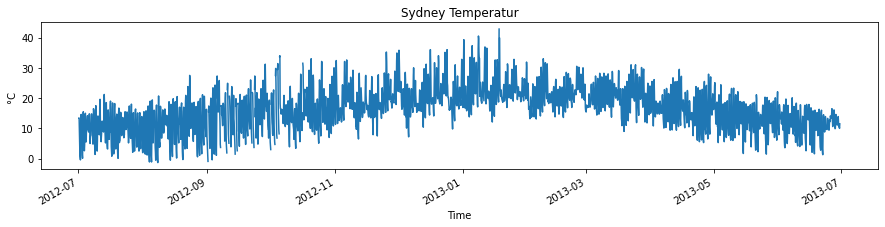

In [6]:
# Visualize Temperature
df.temp.plot(title="Sydney Temperatur",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="°C",
             kind="line"
            )

<AxesSubplot: title={'center': 'Relative Humidity'}, xlabel='Time', ylabel='%'>

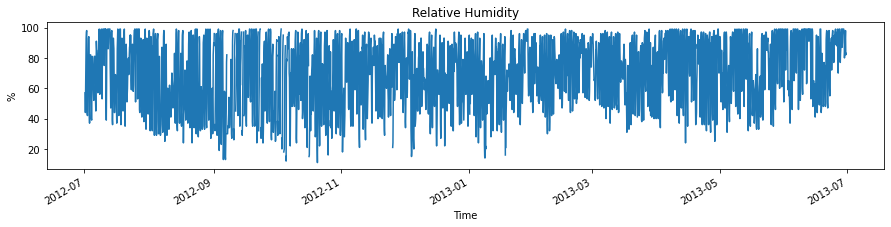

In [7]:
# Visualize Relative Humidity
df.rhum.plot(title="Relative Humidity",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="%",
             kind="line"
            )

In [9]:
#Save the dataframe
#weather_sliced.to_csv('../2012-2013 Weather_preprocessed.csv', index=False)